In [1]:
%matplotlib inline
#%pylab
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import scipy
from scipy import interpolate
import pandas as pd
import itertools
from root_numpy import root2array, root2rec, tree2rec, array2root
from ROOT import TChain

In [2]:
#rec1 = root2array("/Users/vgenty/git/LARLITE/UserDev/MichelReco/MichelCluster/ana.root","out_tree")
rec1 = root2array("/Users/vgenty/Dropbox/ana.root","out_tree")
df_michel = pd.DataFrame(rec1)

In [3]:
#df_michel.iloc[[8]]
the_cut = []
for i in np.where(df_michel['_largest_cluster_charge']*0.008*1.4    >= 0)[0]:
    if i in np.where(df_michel['_largest_cluster_charge']*0.008*1.4 >=  0)[0]:
        the_cut.append(i)
#print the_cut

In [168]:
#vars.index
#zig['_largest_cluster_charge'][5]*0.008*1.4
vars[5][zig['boundary'][5]]

0.60175522465479947

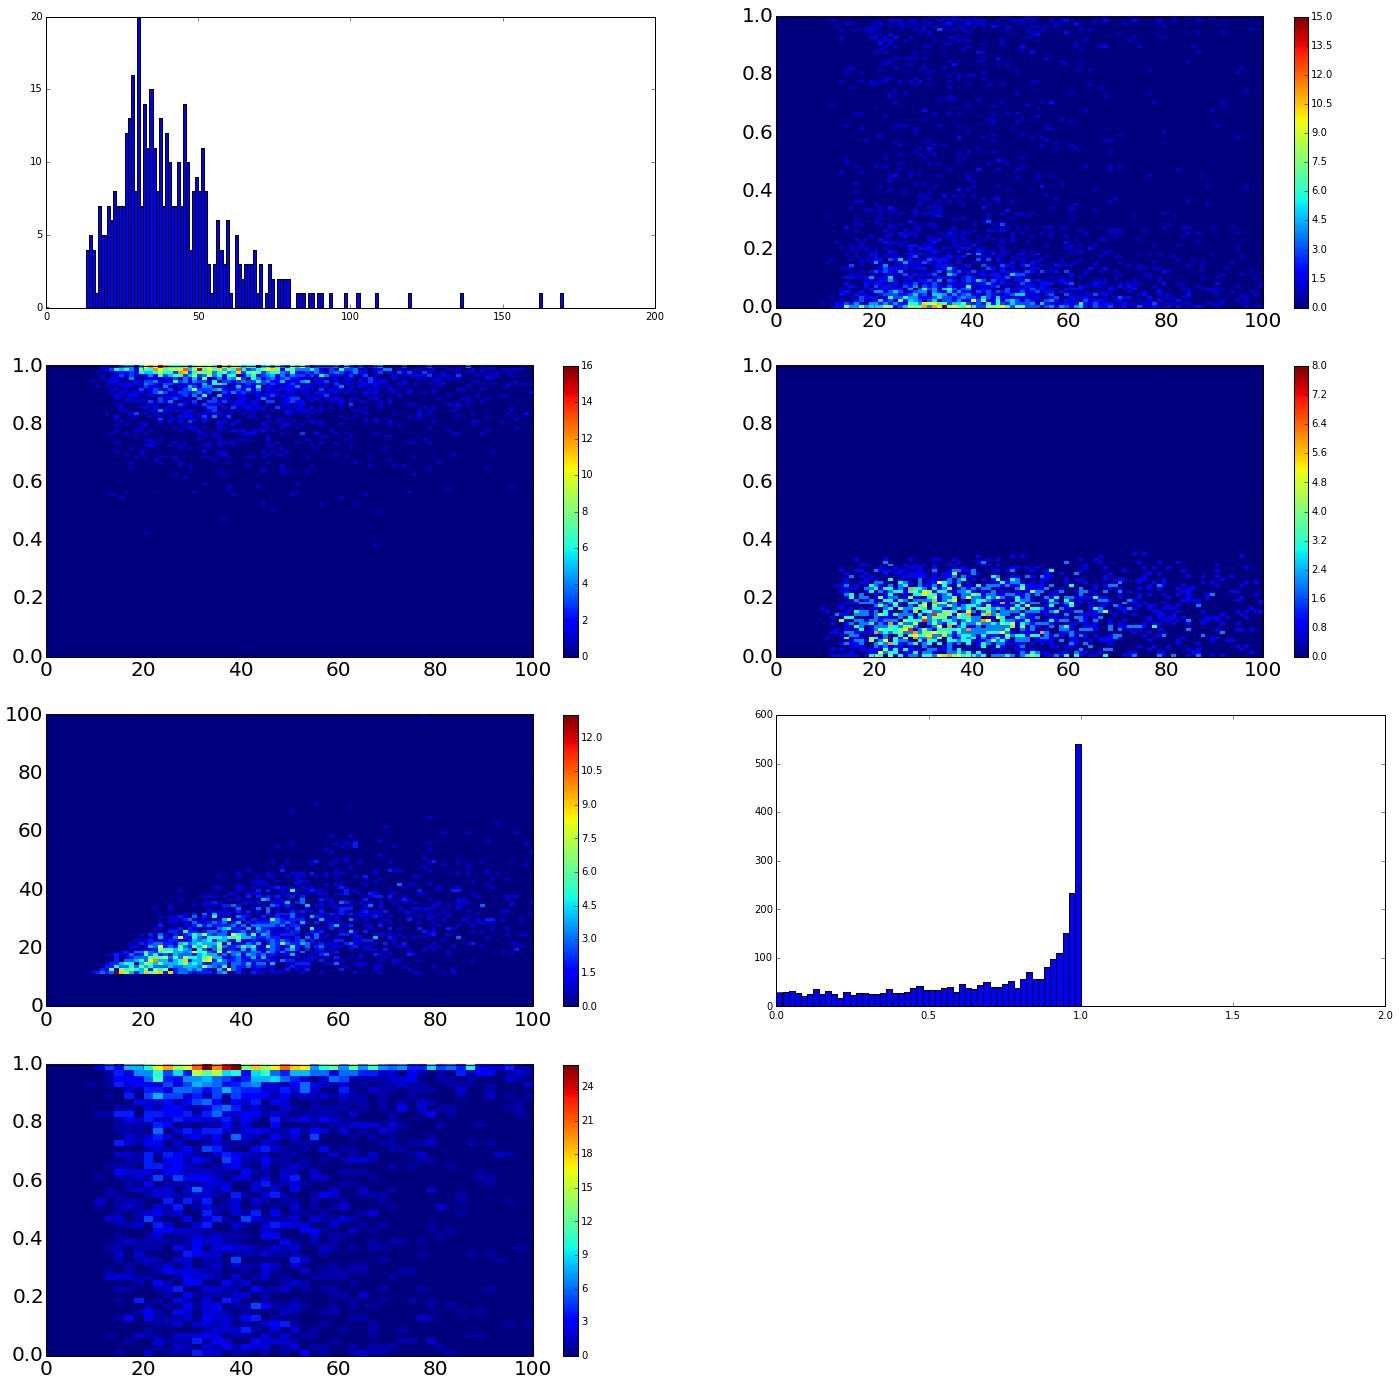

In [238]:
zig = df_michel[(df_michel['_largest_cluster_charge'] >= 0) & 
                (df_michel['_number_of_clusters']    >= 1)    &
                (df_michel['_n_hits_in_largest_cluster_michel'] > 10)]
#bb  = df_michel['_largest_cluster_charge'];

#print bb
#plt.hist(bb * 0.008 * 1.4,bins=100,range=(0,200))

plt.figure(figsize=(24,24))
plt.subplot(4,2,1)

vars = abs(zig['covariance_in_largest_cluster'])


bb2  = [] 

lowestchis = []
avgchis = []
rmschis = []
regionchi = []
XXX = []
#vars[0][zig['boundary'][0]]
c=0
for i in vars:
    idx = vars.index[c]
    #print "On index %d and c is %d"% (idx,c)
    if i.size == 0:
        c +=1
        continue
    try:
        bb2.append(zig['_largest_cluster_charge'][idx]*0.008*1.4)
        XXX.append(zig['_n_hits_in_largest_cluster_michel'][idx])
        regionchi.append(vars[idx][zig['boundary'][idx]])
        lowestchis.append(get_lowest_chi(i))
        avgchis.append(get_avg_chi(i))
        rmschis.append(get_rms_chi(i))
    except ValueError:
        bb2.append(zig['_largest_cluster_charge'][idx]*0.008*1.4)
        XXX.append(zig['_n_hits_in_largest_cluster_michel'][idx])
        lowestchis.append(2)
        avgchis.append   (2)
        rmschis.append   (2)
        regionchi.append(vars[idx][zig['boundary'][idx]])
    c +=1



bbb2 = np.array([bb2[i] for i in xrange(len(bb2)) if (lowestchis[i] < 0.2 and 
                                                      avgchis[i] > 0.8 and
                                                      regionchi[i] < 0.4)])
plt.hist(bbb2,bins=200,range=(0,200))

plt.subplot(4,2,2)

QX = plt.hist2d(bb2,lowestchis, 
                bins = 100,
                range=np.array([(0, 100), (0,1)]))

plt.colorbar()
plt.tick_params(labelsize=20)

plt.subplot(4,2,3)

QQ = plt.hist2d(bb2,avgchis, 
                bins = 100,
                range=np.array([(0, 100), (0,1)]))

plt.colorbar()
plt.tick_params(labelsize=20)
plt.subplot(4,2,4)

QE = plt.hist2d(bb2,rmschis, 
                bins = 100,
                range=np.array([(0, 100), (0,1)]))

plt.colorbar()
plt.tick_params(labelsize=20)

plt.subplot(4,2,5)

QO = plt.hist2d(bb2,XXX, 
                bins = 100,
                range=np.array([(0, 100), (0,100)]))

plt.colorbar()
plt.tick_params(labelsize=20)

plt.subplot(4,2,6)
plt.hist(regionchi,bins=100,range=(0,2))

plt.subplot(4,2,7)

QX = plt.hist2d(bb2,regionchi, 
                bins = 50,
                range=np.array([(0, 100), (0,1)]))

plt.colorbar()
plt.tick_params(labelsize=20)
plt.show()

In [27]:
bb  = df_michel[(df_michel['_largest_cluster_charge'] >= 0) & 
                (df_michel['_number_of_clusters']    >= 1)    &
                (df_michel['_n_hits_in_largest_cluster_michel'] > 5) &
                (abs(df_michel['chi_at_boundary']) < 0.8)]['_largest_cluster_charge'];
bb2 = abs(df_michel[(df_michel['_largest_cluster_charge'] >= 0) & 
                (df_michel['_number_of_clusters']    >= 1)    &
                (df_michel['_n_hits_in_largest_cluster_michel'] > 5) &
                (abs(df_michel['chi_at_boundary']) < 0.8)]['chi_at_boundary'])



In [14]:
#print len(df_michel.index)
#print abs(df_michel['chi_at_boundary'])
#chi = []
#for k in xrange(len(df_michel.index)):
#    b = df_michel['boundary'][k]
#    if b < 0:
#        chi.append(1.0)
#    else:
#        chi.append(abs(df_michel['covariance_in_largest_cluster'][k][b]))


#print chi
#chi = [df_michel['covariance_in_largest_cluster'][k][df_michel['boundary'][k]] for k in xrange(len(df_michel.index))]

0        9.856601e-01
1        7.282301e-01
2       6.949181e-310
3       6.949112e-310
4       6.949168e-310
5        6.017552e-01
6        7.795621e-01
7        2.342528e-01
8        2.002286e-02
9        9.571392e-01
10       9.784218e-01
11       2.937664e-01
12       7.744652e-01
13       5.743557e-01
14       2.888649e-01
15       4.927519e-01
16      6.949181e-310
17      6.949168e-310
18       8.761857e-01
19       5.147514e-01
20      6.949181e-310
21       2.000000e+00
22       3.009968e-01
23       9.893254e-01
24       4.508547e-01
25       9.777518e-01
26       9.532436e-01
27       9.741558e-01
28       7.164301e-01
29      6.949181e-310
            ...      
4606    6.949168e-310
4607    6.949175e-310
4608     9.705433e-01
4609    6.949168e-310
4610    6.949175e-310
4611    6.949168e-310
4612     3.690943e-01
4613     9.892672e-01
4614    6.949168e-310
4615     3.041651e-01
4616     6.109101e-01
4617    6.949175e-310
4618    6.949175e-310
4619     9.174236e-01
4620    6.

0.231653753785
~~~~
~~~~


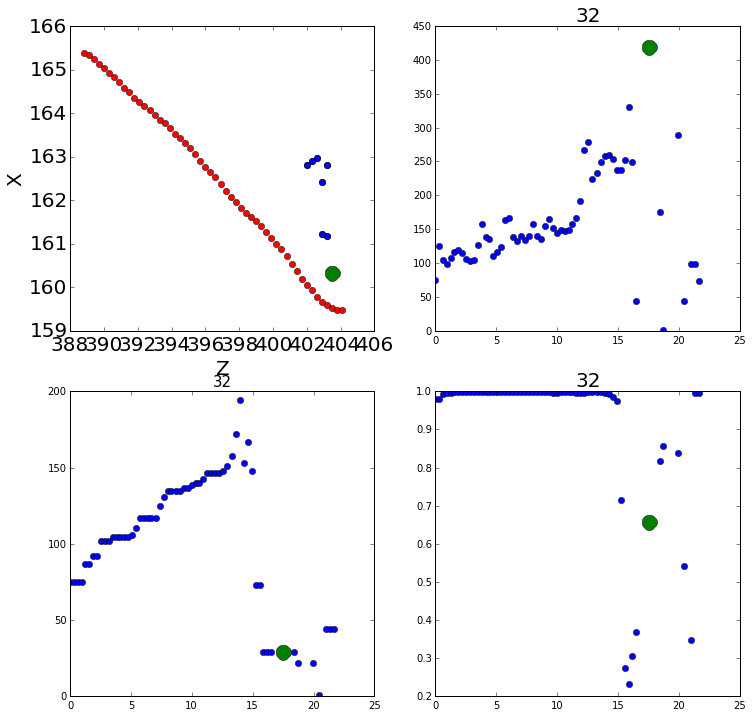

In [85]:
k = 32

print get_lowest_chi(abs(df_michel['covariance_in_largest_cluster'][k]))

plt.figure(figsize=(12,12))

print "~~~~"
#print "(%d,%d)" % (df_michel['s'][k][df_michel['IMIN'][k]]
#                       ,df_michel['s'][k][df_michel['IMAX'][k]])
#print "(%d,%d)" % (df_michel['IMIN'][k]
#                    ,df_michel['IMAX'][k])

print "~~~~"
plt.subplot(2,2,1)
plt.plot(df_michel["_Z"][k],df_michel["_X"][k],"ro",color="r")
plt.plot(df_michel["michel_Z"][k],df_michel["michel_X"][k],"ro",color="b")
plt.plot(df_michel['_Z'][k][df_michel['boundary'][k]],
         df_michel['_X'][k][df_michel['boundary'][k]],
         "ro",color="green",markersize=15)
plt.xlabel('Z',fontsize=20)
plt.ylabel('X',fontsize=20)

plt.tick_params(labelsize=20)


plt.subplot(2,2,2)
plt.plot(df_michel["s"][k],df_michel["charge_in_largest_cluster"][k],"o")
plt.plot(df_michel['s'][k][df_michel['boundary'][k]],
         df_michel['charge_in_largest_cluster'][k][df_michel['boundary'][k]],
         "ro",color="green",markersize=15)
plt.title("%s" % k,fontsize=20)

plt.subplot(2,2,3)
plt.plot(df_michel["s"][k],df_michel["truncated_charge_in_largest_cluster"][k],"o")
plt.plot(df_michel['s'][k][df_michel['boundary'][k]],
         df_michel['truncated_charge_in_largest_cluster'][k][df_michel['boundary'][k]],
         "ro",color="green",markersize=15)   
plt.title("%s" % k,fontsize=15)

plt.subplot(2,2,4)
#zz = df_michel["truncated_dqds_in_largest_cluster"][k]
zz = abs(df_michel["covariance_in_largest_cluster"][k])
yy = abs(df_michel['covariance_in_largest_cluster'][k][df_michel['boundary'][k]])

plt.title("%s" % k,fontsize=20)
if(zz.size > 0):
    plt.plot(df_michel["s"][k],zz,"o")
    plt.plot(df_michel['s'][k][df_michel['boundary'][k]]
         ,yy,
         "ro",color="green",markersize=15)

plt.show()

In [96]:
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Return a subplot axes positioned by the given grid definition.
    
    Typical call signature::
    
      subplot(nrows, ncols, plot_number)
    
    Where *nrows* and *ncols* are used to notionally split the figure
    into ``nrows * ncols`` sub-axes, and *plot_number* is used to identify
    the particular subplot that this function is to create within the notional
    grid. *plot_number* starts at 1, increments across rows first and has a
    maximum of ``nrows * ncols``.
    
    In the case when *nrows*, *ncols* and *plot_number* are all less than 10,
    a convenience exists, such that the a 3 digit number can be given instead,
    where the hundreds represent *nrows*, the tens represent *ncols* and the
    units represent *plot_number*. For instance::
    
      subplot(211)
    
    produces a subaxes in a figure which represents the top plot (i.e. the
    first) in a 2 row by 1 column notiona

In [27]:
def get_lowest_chi(list):
    list = np.array(list)
    return np.amin(list)
def get_avg_chi(list):
    list = np.array(list)
    return np.mean(list)
def get_rms_chi(list):
    list = np.array(list)
    return np.std(list)

In [12]:
print get_lowest_chi(abs(df_michel['covariance_in_largest_cluster'])[0])

0.257364044538


In [66]:
print df_michel['covariance_in_largest_cluster']

0       [-0.997910639753, -0.997910639753, -0.99817256...
1       [0.23647142716, 0.23647142716, 0.824567663648,...
2                                                      []
3                                                      []
4                                                      []
5       [0.983707219632, 0.983707219632, 0.93061344679...
6       [0.99076764502, 0.99076764502, 0.997226313218,...
7       [-0.991749075804, -0.991749075804, -0.99734977...
8       [0.995405483836, 0.995405483836, 0.99589927970...
9       [-0.687096599172, -0.687096599172, -0.80888158...
10      [-0.978421844926, -0.978421844926, -0.99412281...
11      [0.955944371737, 0.955944371737, 0.99017837119...
12      [-0.997003382412, -0.997003382412, -0.99779335...
13      [-0.995305331047, -0.995305331047, -0.98654528...
14      [-0.985234732191, -0.985234732191, -0.99611268...
15      [-0.566639698646, -0.566639698646, -0.95043282...
16                                                     []
17            

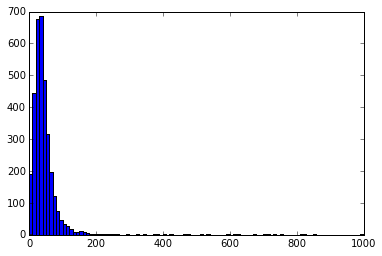

In [236]:
#ZZZ = df_michel[(df_michel['_largest_cluster_charge'] >= 0) & 
#                (df_michel['_number_of_clusters']    >= 1)    &
#                (df_michel['_n_hits_in_largest_cluster_michel'] < 10)]

ZZZ = df_michel.query('_largest_cluster_charge >= 0' and
                      '_number_of_clusters >= 1'     and
                      '_n_hits_in_largest_cluster_michel <= 100' and
                     '_n_hits_in_largest_cluster_michel >= 0')

plt.hist(ZZZ['_largest_cluster_charge']*0.008*1.4,bins=100)
plt.show()
